In [1]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import random

#Libraries for Saving the Model
from pickle import dump
from pickle import load

In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
dataset = read_csv('creditcard.csv')

In [4]:
dataset.iloc[:,0:30]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [43]:
from torch import tensor
t_dep = tensor(dataset.Class,dtype=torch.float)
t_dep.shape

torch.Size([284807])

In [44]:
t_indep = tensor(dataset.iloc[:,0:30].values,dtype=torch.float)

In [45]:
t_indep.shape

torch.Size([284807, 30])

In [46]:
trn_indep,val_indep,trn_dep,val_dep = train_test_split(t_indep,t_dep,test_size=0.2,random_state=random.seed())

In [47]:
n_coeff = t_indep.shape[1]
print(n_coeff)

30


In [10]:
!pip install fastai

In [11]:
from fastai.tabular.all import *

In [12]:
splits = RandomSplitter(seed=42)(dataset)

In [13]:
col_names=list(dataset.iloc[:,0:30].columns)


In [14]:
dls = TabularPandas(
    dataset, splits=splits,
    cont_names=col_names,
    y_names="Class", y_block = CategoryBlock(),
).dataloaders(path=".")

In [15]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.2089296132326126, valley=0.0063095735386013985)

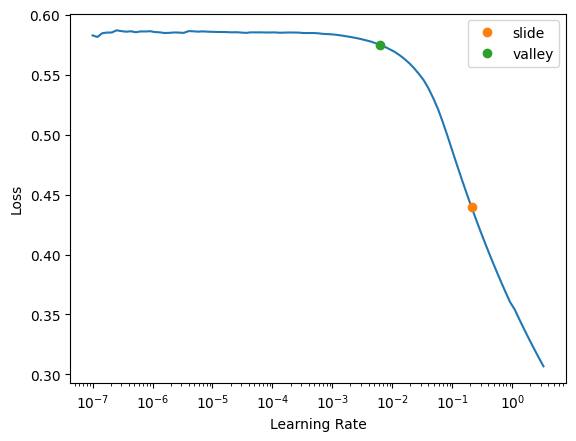

In [16]:
learn.lr_find(suggest_funcs=(slide, valley))

In [17]:
learn.fit(8, lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.005322,0.028997,0.997279,00:36
1,0.002320,0.045039,0.998473,00:35
2,0.012141,0.050210,0.997665,00:34
3,0.009509,0.013989,0.999070,00:34
4,0.006854,1343.815186,0.997788,00:36
5,0.007577,20.212097,0.998139,00:35
6,0.006890,0.008126,0.999175,00:36
7,0.007683,0.057555,0.998666,00:36


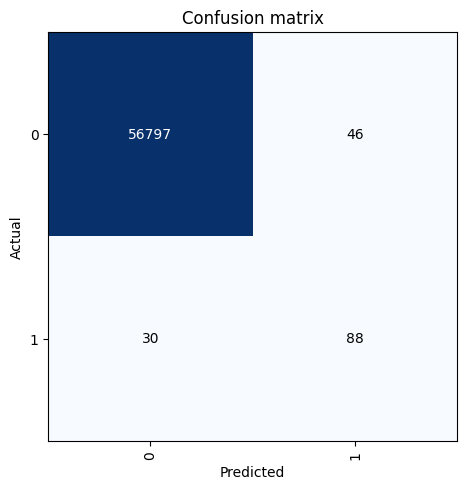

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [90]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_


# model definition
class Net(nn.Module):
    def __init__(self, n_inputs):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(n_inputs, 60)
        nn.init.kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.bn1 = nn.BatchNorm1d(60)  # Add Batch Normalization layer
        self.act1 = nn.ReLU()
        
        self.hidden2 = nn.Linear(60, 30)
        nn.init.kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.bn2 = nn.BatchNorm1d(30)  # Add Batch Normalization layer
        self.act2 = nn.ReLU()
        
        self.hidden3 = nn.Linear(30, 1)
        nn.init.xavier_uniform_(self.hidden3.weight)
        self.act3 = nn.Sigmoid()
 
    def forward(self, X):
        X = self.hidden1(X)
        X = self.bn1(X)  # Apply Batch Normalization
        X = self.act1(X)
        
        X = self.hidden2(X)
        X = self.bn2(X)  # Apply Batch Normalization
        X = self.act2(X)
        
        X = self.hidden3(X)
        X = self.act3(X)
        return X

model = Net(trn_indep.shape[1]).to(device)


In [91]:

print(model)


Net(
  (hidden1): Linear(in_features=30, out_features=60, bias=True)
  (bn1): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=60, out_features=30, bias=True)
  (bn2): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=30, out_features=1, bias=True)
  (act3): Sigmoid()
)


In [105]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCELoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.Adam(params=model.parameters(), 
                            lr=0.0001)

In [38]:
!pip install torchmetrics

In [39]:
 from torchmetrics.classification import BinaryRecall


In [93]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [107]:
torch.manual_seed(42)
recall_metric=BinaryRecall().to(device)
# Set the number of epochs
epochs = 50000

# Put data to target device
trn_indep, trn_dep = trn_indep.to(device), trn_dep.to(device)
val_indep, val_dep = val_indep.to(device), val_dep.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model(trn_indep).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   trn_dep) 
    acc = accuracy_fn(y_true=trn_dep, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(val_indep).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            val_dep)
        test_acc = accuracy_fn(y_true=trn_dep, 
                      y_pred=y_pred)

    # Print out what's happening every 10 epochs
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.06630, Accuracy: 34.86% | Test loss: 0.37002, Test acc: 34.86%
Epoch: 1000 | Loss: 0.05046, Accuracy: 36.55% | Test loss: 0.19145, Test acc: 36.55%
Epoch: 2000 | Loss: 0.09916, Accuracy: 33.38% | Test loss: 0.62592, Test acc: 33.38%
Epoch: 3000 | Loss: 0.09384, Accuracy: 34.03% | Test loss: 1.46957, Test acc: 34.03%
Epoch: 4000 | Loss: 0.05445, Accuracy: 36.46% | Test loss: 0.35504, Test acc: 36.46%
Epoch: 5000 | Loss: 0.04300, Accuracy: 39.53% | Test loss: 0.16250, Test acc: 39.53%
Epoch: 6000 | Loss: 0.17769, Accuracy: 33.39% | Test loss: 3.22696, Test acc: 33.39%
Epoch: 7000 | Loss: 0.10335, Accuracy: 33.40% | Test loss: 0.36362, Test acc: 33.40%
Epoch: 8000 | Loss: 0.07372, Accuracy: 34.36% | Test loss: 0.11388, Test acc: 34.36%
Epoch: 9000 | Loss: 0.08597, Accuracy: 33.92% | Test loss: 0.09746, Test acc: 33.92%
Epoch: 10000 | Loss: 0.07104, Accuracy: 35.00% | Test loss: 0.28661, Test acc: 35.00%
Epoch: 11000 | Loss: 0.07742, Accuracy: 39.48% | Test loss: 1.54646

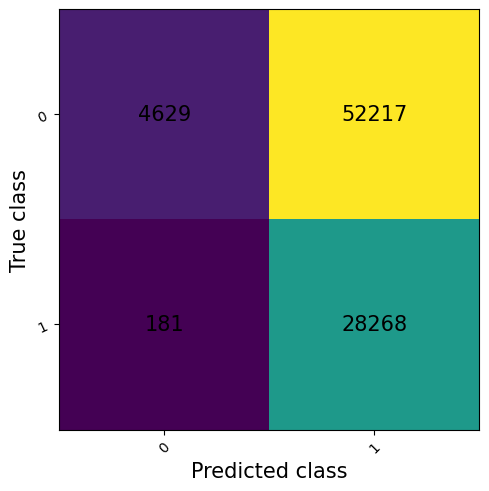

In [108]:
from torchmetrics.classification import MulticlassConfusionMatrix
metric = MulticlassConfusionMatrix(num_classes=2).to(device)
metric.update(test_pred.to(device), val_dep.to(device))
fig_, ax_ = metric.plot()

In [27]:
!pip install imbalanced-learn

In [53]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']

ros = RandomOverSampler(sampling_strategy=0.5)
X_over,Y_over=ros.fit_resample(X, Y)

In [54]:
df = pd.concat([X_over, Y_over], axis=1)
class_names = {0:'Not fraud',1:'Fraud'}
print(df.Class.value_counts().rename(index=class_names))

Not fraud    284315
Fraud        142157
Name: Class, dtype: int64


In [55]:
t_indep = tensor(X_over.iloc[:,0:30].values,dtype=torch.float)
t_dep=tensor(Y_over,dtype=torch.float)

In [56]:
trn_indep,val_indep,trn_dep,val_dep =train_test_split(t_indep,t_dep,test_size=0.2,random_state=random.seed())

In [57]:
trn_indep.shape[1],trn_dep.shape,t_dep.shape

(30, torch.Size([341177]), torch.Size([426472]))

In [103]:

torch.manual_seed(42)
recall_metric=BinaryRecall().to(device)
# Set the number of epochs
epochs = 5000

# Put data to target device
trn_indep, trn_dep = trn_indep.to(device), trn_dep.to(device)
val_indep, val_dep = val_indep.to(device), val_dep.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model(trn_indep).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   trn_dep) 
    acc = accuracy_fn(y_true=trn_dep, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.no_grad():
        # 1. Forward pass
        test_logits = model(val_indep).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            val_dep)
        test_acc = accuracy_fn(y_true=val_dep,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {acc:.2f}%")

Epoch: 0 | Loss: 0.06326, Accuracy: 33.61% | Test loss: 0.11540, Test acc: 33.61%
Epoch: 10 | Loss: 0.06250, Accuracy: 33.61% | Test loss: 0.09123, Test acc: 33.61%
Epoch: 20 | Loss: 0.06601, Accuracy: 33.60% | Test loss: 0.15271, Test acc: 33.60%
Epoch: 30 | Loss: 0.06513, Accuracy: 33.64% | Test loss: 0.08276, Test acc: 33.64%
Epoch: 40 | Loss: 0.06256, Accuracy: 33.64% | Test loss: 0.07090, Test acc: 33.64%
Epoch: 50 | Loss: 0.06139, Accuracy: 33.62% | Test loss: 0.07975, Test acc: 33.62%
Epoch: 60 | Loss: 0.06123, Accuracy: 33.61% | Test loss: 0.07578, Test acc: 33.61%
Epoch: 70 | Loss: 0.06156, Accuracy: 33.64% | Test loss: 0.07238, Test acc: 33.64%
Epoch: 80 | Loss: 0.06143, Accuracy: 33.62% | Test loss: 0.07332, Test acc: 33.62%
Epoch: 90 | Loss: 0.06132, Accuracy: 33.63% | Test loss: 0.06766, Test acc: 33.63%
Epoch: 100 | Loss: 0.06080, Accuracy: 33.64% | Test loss: 0.07480, Test acc: 33.64%
Epoch: 110 | Loss: 0.06096, Accuracy: 33.63% | Test loss: 0.07130, Test acc: 33.63%
Epo

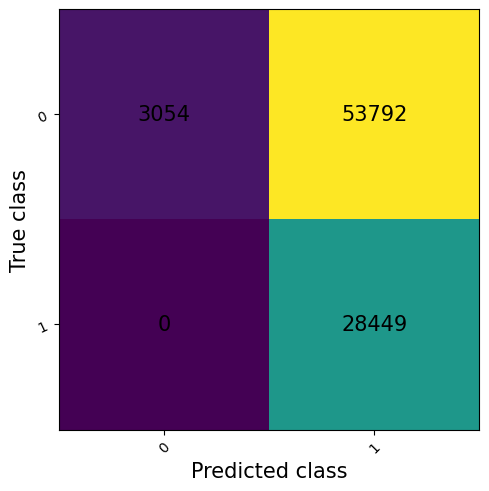

In [104]:
from torchmetrics.classification import MulticlassConfusionMatrix
metric = MulticlassConfusionMatrix(num_classes=2).to(device)
metric.update(test_pred.to(device), val_dep.to(device))
fig_, ax_ = metric.plot()